# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [3]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [4]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [5]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

C:\Users\TEST\AppData\Local\Temp\ipykernel_13508\2438761054.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired')
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


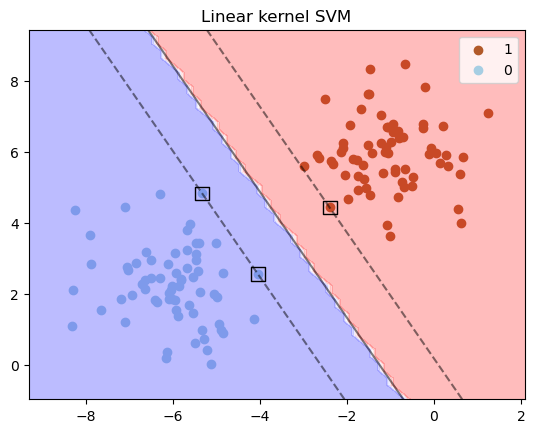

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

C:\Users\TEST\AppData\Local\Temp\ipykernel_13508\2279204386.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Paired')
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


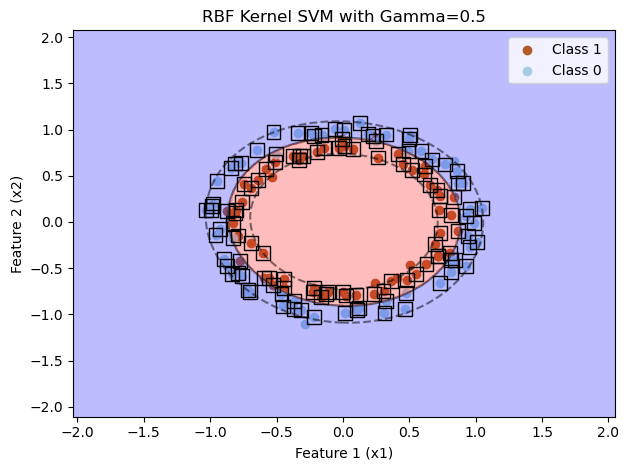

In [7]:
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# Splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# Build the RBF SVM model with gamma=0.5
model_rbf = svm.SVC(kernel='rbf', gamma=0.5, random_state=33)
model_rbf.fit(X_train, Y_train)

# Create plot
fig, ax = plt.subplots()

# Get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# Plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='Class 1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='Class 0')
ax.legend(loc='best')

# Plot the decision function
# Create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .02),
                     np.arange(x2_min, x2_max, .02))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model_rbf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model_rbf.predict(xy).reshape(XX.shape)

# Visualization of the decision regions
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# Plot support vectors
ax.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

# Set plot limits and labels
ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('RBF Kernel SVM with Gamma=0.5')
plt.tight_layout()
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

You use an RBF kernel when the data is not linearly separable, or in other words when the classes cannot be separated by a single straight line.
The RBF kernel creates a non-linear decision boundary that is more flexible and can adapt to more complex patterns in the data.

Yes, normalization is important when a kernel (such as RBF) is used, because it depends on the distance between points in the input space. Scaling the data ensures that no single feature disproportionately influences the model.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.


## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 


## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score

# Initialize model
svc = svm.SVC(random_state=42)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", svc)
])

# Specify hyperparameters
C = np.logspace(-3, 3, 7)
kernel = ("linear", "rbf")
parameters = {"clf__kernel": kernel, "clf__C": C}

# Binarize drug response to make it categorical
drug_response_z = (drug_response["YM155"] - drug_response["YM155"].mean()) / drug_response["YM155"].std()
drug_response_binary = drug_response_z.apply(lambda x: 1 if x > 0 else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response_binary, test_size=0.33, 
                                                    stratify=drug_response_binary, random_state=42)


# Define the parameter grid for the SVM
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel types: linear and RBF
    'gamma': [0.01, 0.1, 0.5, 1]   # Kernel coefficient for RBF kernel
}

# Initialize the SVM classifier
svm_clf = svm.SVC(random_state =42)

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Calculate precision and compare with classification_report
precision = precision_score(y_test, y_pred)
print(f"Calculated precision: {precision}")

# Generate a detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Best hyperparameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Calculated precision: 0.5294117647058824
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        28
           1       0.53      0.43      0.47        21

    accuracy                           0.59        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.58      0.59      0.58        49



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Best hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
Calculated precision for Random Forest: 0.6086956521739131
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        26
           1       0.61      0.61      0.61        23

    accuracy                           0.63        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.63      0.63      0.63        49

Precision of SVM: 0.7037037037037037


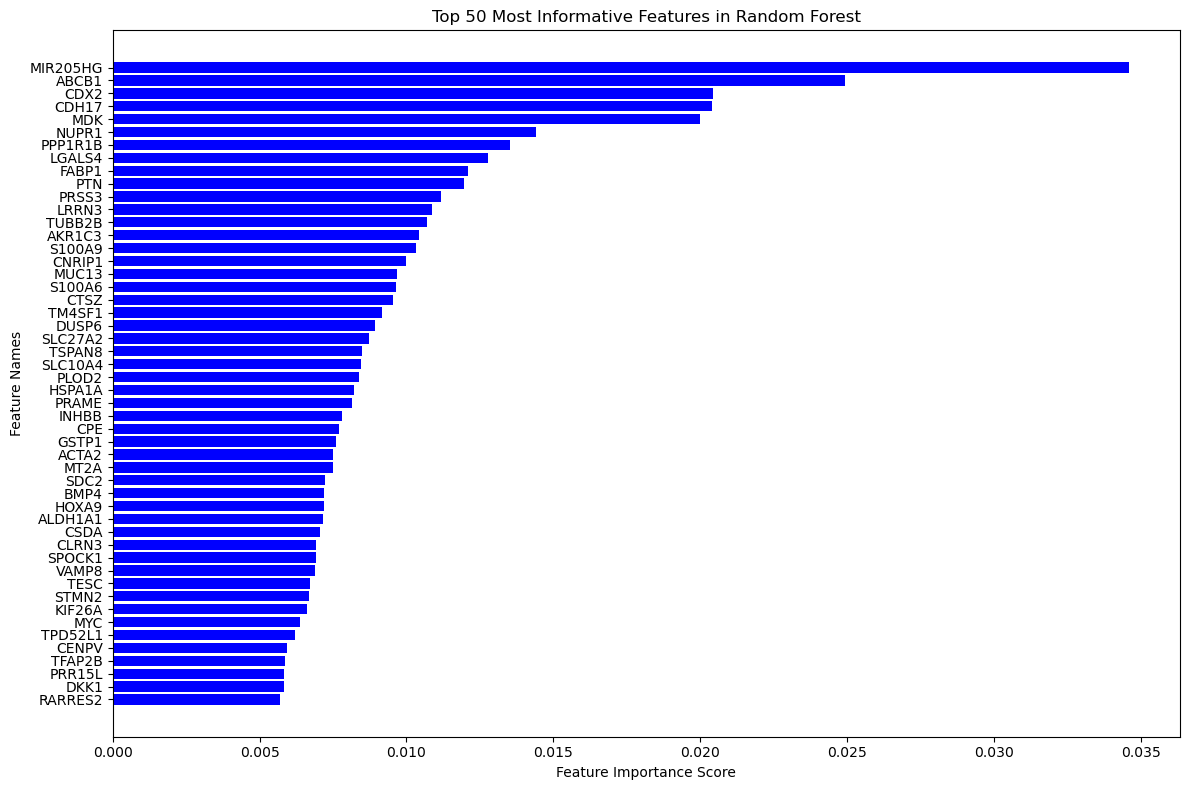

In [13]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score
import matplotlib.pyplot as plt

# Split the data (as in the SVM example)
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response_bin.values.ravel(), test_size=0.33, random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [10, 20, None],          # Max depth of the tree
    'max_features': ['sqrt', 'log2'],     # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'bootstrap': [True]                   # Use bootstrap samples
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='precision')
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Make predictions on the test set using the best model
y_pred_rf = grid_search_rf.predict(X_test)

# Calculate precision score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
print(f"Calculated precision for Random Forest: {precision_rf}")

# Generate a classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:")
print(report_rf)

# Compare with SVM results (for example purposes, we reuse the SVM precision)
print(f"Precision of SVM: {precision}")


# Extract feature importance from the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
top_50_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(50)

# Plot the top 50 most important features
plt.figure(figsize=(12, 8))
plt.barh(top_50_features['Feature'], top_50_features['Importance'], color='b')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Names')
plt.title('Top 50 Most Informative Features in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance on top
plt.tight_layout()
plt.show()


Article: A Random Forest Based Biomarker Discovery and Power Analysis Framework for Diagnostics Research. (https://bmcmedgenomics.biomedcentral.com/articles/10.1186/s12920-020-00826-6)

Random Forest (RF) was chosen due to its strengths in handling large, complex datasets typical of biomarker discovery in genomics research. Biomarker identification is crucial for early diagnosis and patient stratification, but the high dimensionality and non-linear relationships in such data make it challenging. RF excels in managing these complexities, as it can handle numerous variables and capture non-linear patterns.

The authors evaluated various RF-based feature selection methods, including Boruta, permutation-based, and backward elimination approaches. The Boruta method was found to be the most stable, providing consistent biomarker selection, which is essential in ensuring reliable results. Additionally, the permutation method without correction identified a broad set of relevant features over multiple iterations, highlighting RF’s flexibility in feature extraction.

RF was chosen for its ensemble approach, which reduces overfitting and enhances model stability compared to single decision trees. Its built-in feature importance ranking allows researchers to identify the most relevant biomarkers in a consistent and unbiased manner.